# COGS 189 Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

// This disables scrolling outputs

<IPython.core.display.Javascript object>

# Read data with added stim channel
See find_peaks_stim_channel.ipynb for generating the stim channel from aux data.

In [3]:
data = pd.read_csv("exp0_sub0_8ch_1stim.csv") # Amy
#data = pd.read_csv("exp0_sub1_8ch_1stim.csv") # Andres
data.head()

Unnamed: 0          EXG0          EXG1         EXG2          EXG3  \
0           0  12584.725032  15524.024132 -2317.138292  17950.261289   
1           1  12595.587980  15529.410902 -2316.959478  17958.352620   
2           2  12579.830000  15523.957077 -2315.327801  17950.641269   
3           3      0.000000      0.000000     0.000000      0.000000   
4           4  12535.305325  15492.910503 -2324.290851  17940.381818   

           EXG4         EXG5          EXG6          EXG7  Analog0  Analog1  \
0  14667.952319  7234.834997  18205.361748  19735.338656    421.0    621.0   
1  14691.756927  7232.622174  18216.045882  19740.792482    402.0    516.0   
2  14672.221502  7231.638698  18202.008987  19733.751682    387.0    445.0   
3      0.000000     0.000000      0.000000      0.000000    445.0    768.0   
4  14577.673623  7226.006058  18228.495804  19714.976217    423.0    622.0   

   Analog2     Timestamp  stim  
0    511.0  1.677707e+09     0  
1    511.0  1.677707e+09     0  
2    511.0  1.677707e+09     0  
3    511.0  1.677707e+09     0  
4    511.0  1.677707e+09     0

# Rescale data from uV to V

In [4]:
eeg_chans = [ch for ch in data if 'EXG' in ch]
data[eeg_chans] /= 1e6 # only run this once!
data[eeg_chans]

EXG0      EXG1      EXG2      EXG3      EXG4      EXG5      EXG6  \
0       0.012585  0.015524 -0.002317  0.017950  0.014668  0.007235  0.018205   
1       0.012596  0.015529 -0.002317  0.017958  0.014692  0.007233  0.018216   
2       0.012580  0.015524 -0.002315  0.017951  0.014672  0.007232  0.018202   
3       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4       0.012535  0.015493 -0.002324  0.017940  0.014578  0.007226  0.018228   
...          ...       ...       ...       ...       ...       ...       ...   
201703  0.013771  0.014851 -0.004501  0.020286  0.018994  0.006362  0.019783   
201704  0.013107  0.014606 -0.004438  0.019796  0.017392  0.006200  0.018913   
201705  0.013206  0.014599 -0.004461  0.019757  0.017268  0.006227  0.018918   
201706  0.013903  0.014849 -0.004529  0.020233  0.018855  0.006398  0.019812   
201707  0.013870  0.014881 -0.004518  0.020326  0.019157  0.006378  0.019899   

            EXG7  
0       0.019735  
1       0.019741  
2       0.019734  
3       0.000000  
4       0.019715  
...          ...  
201703  0.020563  
201704  0.019904  
201705  0.019924  
201706  0.020596  
201707  0.020647  

[201708 rows x 8 columns]

<AxesSubplot: >

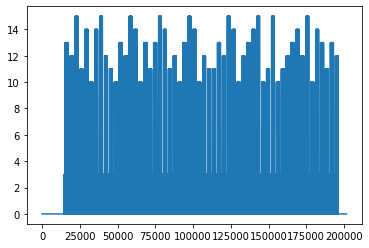

In [5]:
data['stim'].plot()

In [6]:
# Find start of experiment
trigger_rows = data['stim'][data['stim'] > 0].index
START_NDX = trigger_rows[0]
STOP_NDX = trigger_rows[-1]
data.iloc[START_NDX:STOP_NDX, :]

Unnamed: 0      EXG0      EXG1      EXG2      EXG3      EXG4  \
14335        14335  0.012263  0.015185 -0.002606  0.017331  0.014647   
14336        14336  0.012273  0.015188 -0.002605  0.017339  0.014655   
14337        14337  0.012285  0.015193 -0.002606  0.017354  0.014679   
14338        14338  0.012270  0.015188 -0.002605  0.017340  0.014663   
14339        14339  0.012254  0.015180 -0.002604  0.017322  0.014638   
...            ...       ...       ...       ...       ...       ...   
196067      196067  0.013343  0.014623 -0.004452  0.020866  0.018261   
196068      196068  0.013352  0.014627 -0.004454  0.020874  0.018277   
196069      196069  0.013339  0.014624 -0.004453  0.020869  0.018259   
196070      196070  0.013332  0.014620 -0.004452  0.020863  0.018245   
196071      196071  0.013338  0.014622 -0.004452  0.020865  0.018255   

            EXG5      EXG6      EXG7  Analog0  Analog1  Analog2     Timestamp  \
14335   0.007001  0.018105  0.019555    320.0    247.0    433.0  1.677707e+09   
14336   0.007020  0.018119  0.019549    313.0    247.0    500.0  1.677707e+09   
14337   0.007043  0.018141  0.019566    314.0    248.0    555.0  1.677707e+09   
14338   0.007036  0.018131  0.019565    315.0    246.0    498.0  1.677707e+09   
14339   0.007031  0.018115  0.019546    315.0    246.0    511.0  1.677707e+09   
...          ...       ...       ...      ...      ...      ...           ...   
196067  0.006392  0.019228  0.020227    320.0    248.0    516.0  1.677708e+09   
196068  0.006395  0.019237  0.020233    320.0    248.0    514.0  1.677708e+09   
196069  0.006393  0.019230  0.020225    320.0    248.0    510.0  1.677708e+09   
196070  0.006391  0.019222  0.020220    320.0    248.0    506.0  1.677708e+09   
196071  0.006392  0.019240  0.020224    319.0    245.0    362.0  1.677708e+09   

        stim  
14335      1  
14336      0  
14337      0  
14338      0  
14339      0  
...      ...  
196067     0  
196068     0  
196069     0  
196070     0  
196071     0  

[181737 rows x 14 columns]

# Import Channel Map
(this was just written out as a txt file during data collection)

In [7]:
chan_map_path = r'../data/exp0/OpenBCISession_2023-03-01_13-30-42/chan_map.txt'
# for exp0, same channel map was used for both subjects

chan_map = pd.read_csv(chan_map_path,
                      delimiter='\t')
chan_map

Cyton   004
0    REF  CPz
1    GND  AFz
2      1   Fz
3      2   Cz
4      3   Pz
5      4  Fp1
6      5   F7
7      6   T6
8     7    T4
9      8   T3

# Make an MNE Info Object

In [8]:
FS_EEG = 250.0

col_names = data.keys()

nchan = len(eeg_chans)
print('#Channels:', nchan)

# Container to populate with MNE channel types
ch_names = ['']*len(col_names)
ch_types = ['']*len(col_names)

ch_ndx = 0
for col in col_names:
    # print(ch_ndx, col)
    if 'EXG' in col:
        ch_names[ch_ndx] = chan_map.iloc[ch_ndx+1, 1]
        print(ch_ndx, ch_names[ch_ndx])
        ch_types[ch_ndx] = 'eeg'
    elif 'stim' in col:
        ch_names[ch_ndx] = col
        ch_types[ch_ndx] = 'stim'
    else: # Analog / Timestamp
        ch_names[ch_ndx] = col
        ch_types[ch_ndx] = 'misc'
    ch_ndx += 1

info = mne.create_info(
    ch_names=ch_names, 
    sfreq=FS_EEG, 
    ch_types=ch_types
)

# Apply 10-20 montage for these channels
info.set_montage('standard_1020', match_case=False)

#Channels: 8
1 Fz
2 Cz
3 Pz
4 Fp1
5 F7
6 T6
7 T4
8 T3


<Info | 8 non-empty values
 bads: []
 ch_names: Unnamed: 0, Fz, Cz, Pz, Fp1, F7, T6, T4, T3, Analog0, Analog1, ...
 chs: 5 misc, 8 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 250.0 Hz
>

# Import the data into MNE

In [9]:
# Need to transpose the data
raw = mne.io.RawArray(data.iloc[START_NDX:STOP_NDX, :].T, info)

raw

Creating RawArray with float64 data, n_channels=14, n_times=181737
    Range : 0 ... 181736 =      0.000 ...   726.944 secs
Ready.


<RawArray | 14 x 181737 (726.9 s), ~19.4 MB, data loaded>

# Try a PSD plot of raw data
Watch out for 60 Hz!

Using matplotlib as 2D backend.


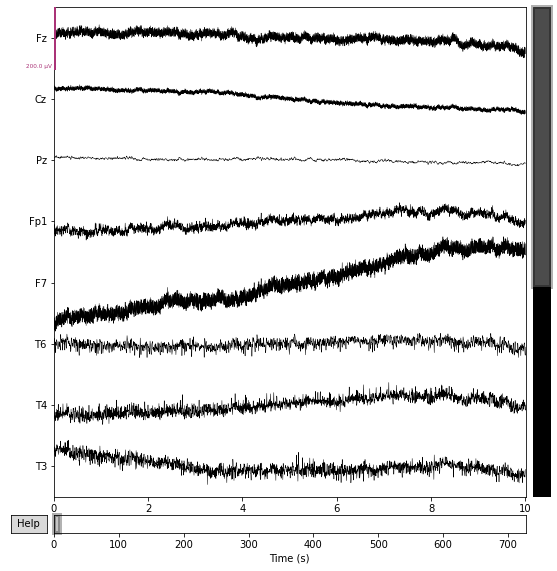

Effective window size : 1.024 (s)


/usr/local/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


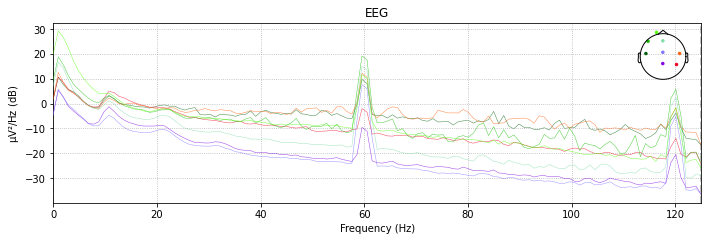

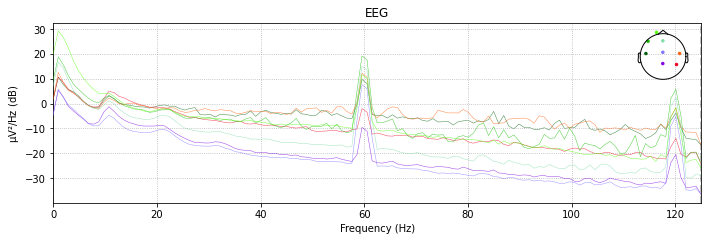

In [10]:
scalings = {'eeg': 100e-6, 'bio': 1, 'time': 1}

raw.plot(n_channels=8, scalings=scalings, title='test',
         show=True, block=True)


raw.compute_psd().plot(average = False)

# Bandpass Filter
https://mne.tools/dev/auto_tutorials/preprocessing/30_filtering_resampling.html

In [11]:
raw_filtered = raw.copy().filter(
    l_freq = 0.1, 
    h_freq = 30
)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (33.004 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


Effective window size : 1.024 (s)


/usr/local/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


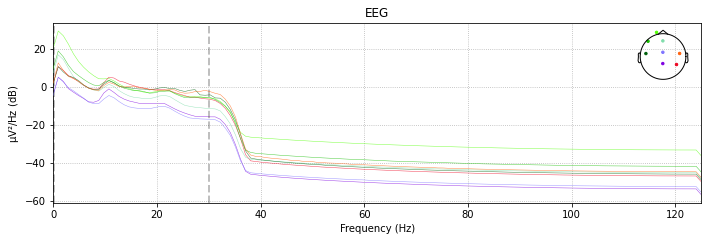

In [12]:
raw_filtered.compute_psd().plot(average = False)
plt.show()

# Set reference to average
https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html

In [13]:
filt_reref = raw_filtered.copy() #.set_eeg_reference(
#    ref_channels='average'
#)

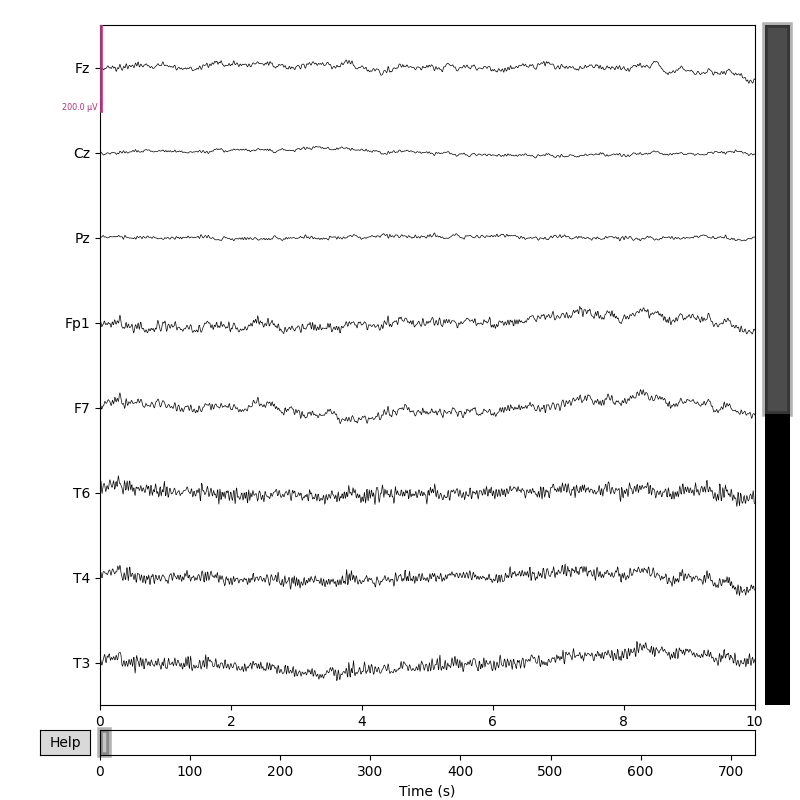

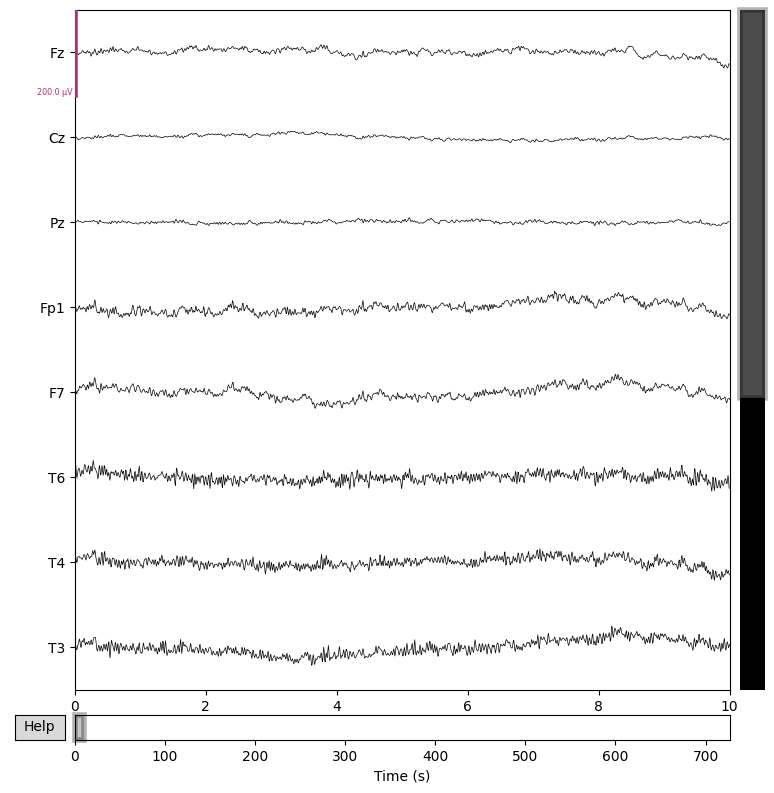

In [14]:
%matplotlib widget

filt_reref.plot(n_channels=8, scalings=scalings, title='test',
         show=True, block=True)

Using EOG channels: Fp1, F7, Fz
EOG channel index for this subject is: [1 4 5]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 3 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 3.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 2.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 602 significant peaks
Number of EOG events detected: 602


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


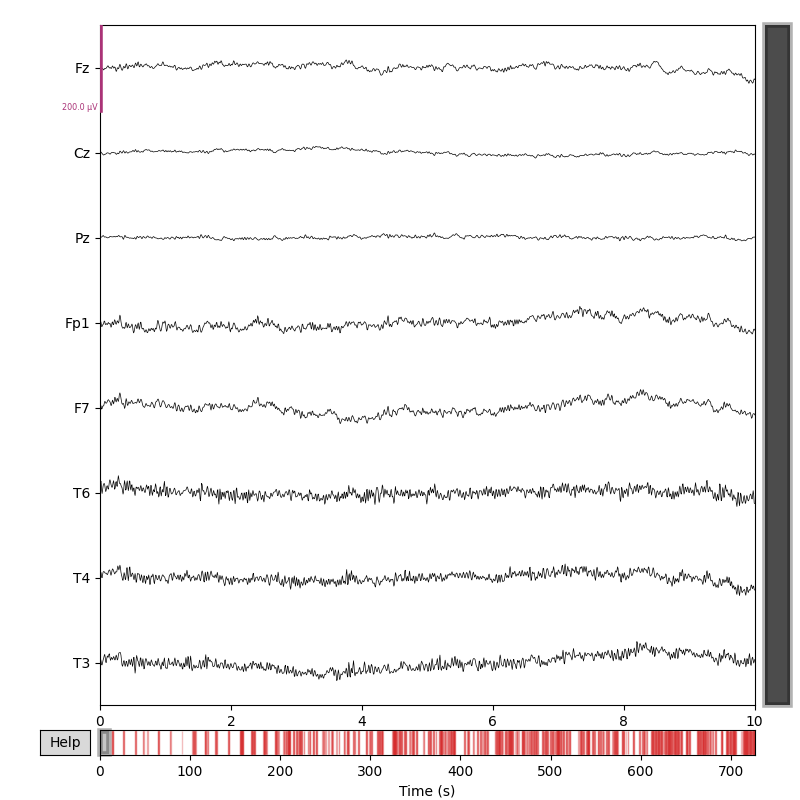

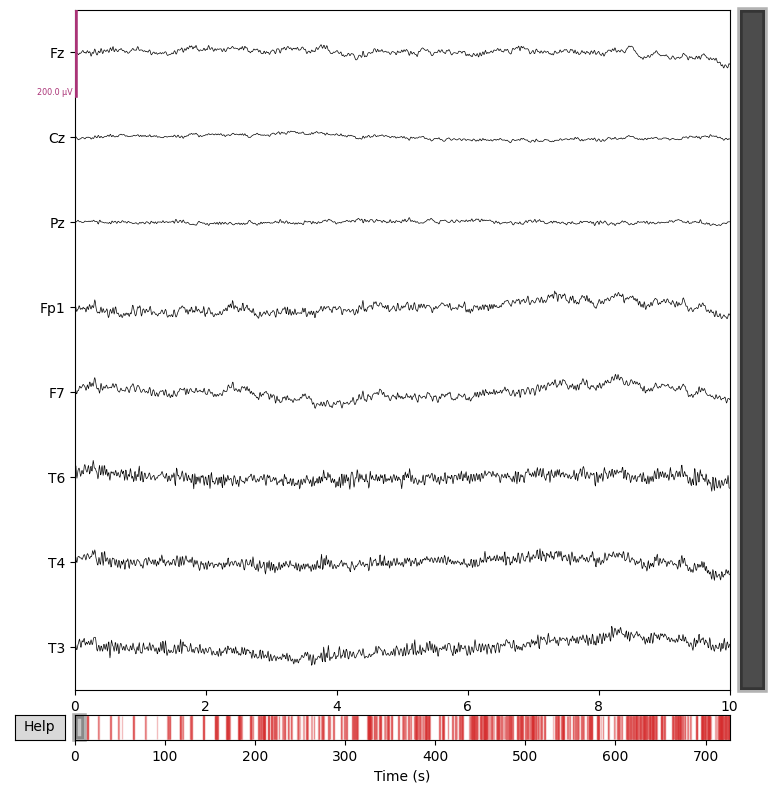

In [15]:
# https://mne.tools/stable/auto_tutorials/preprocessing/20_rejecting_bad_data.html#generating-annotations-programmatically
eog_events = mne.preprocessing.find_eog_events(
    filt_reref,
    ch_name = ['Fp1', 'F7', 'Fz'],
    l_freq = 3, 
    h_freq = 10,
    thresh = 30e-6,
)
onsets = eog_events[:, 0] / filt_reref.info['sfreq'] - 0.25
durations = [0.65] * len(eog_events)
descriptions = ['bad blink'] * len(eog_events)
blink_annot = mne.Annotations(onsets, durations, descriptions,
                              orig_time=filt_reref.info['meas_date'])
filt_reref.set_annotations(blink_annot)

# Select eeg channels to plot
eeg_picks = mne.pick_types(filt_reref.info, eeg=True)
filt_reref.plot(events=eog_events, scalings=scalings, order=eeg_picks)

# Epoch
https://mne.tools/stable/generated/mne.find_events.html

## Trigger Labels

Trigger | Description
:-- | :--
0 | nothing
1 | trial start (loud cue)
2 | loud cue
3 | soft cue
X | auto-assigned by stim wave used

X by stim file used:

```
 'audio/exp0/kick_iso.wav': 10,
 'audio/exp0/kick_mp1.wav': 11,
 'audio/exp0/kick_mp2.wav': 12,
 'audio/exp0/snare_iso.wav': 13,
 'audio/exp0/snare_mp1.wav': 14,
 'audio/exp0/snare_mp2.wav': 15
```

In [16]:
events = mne.find_events(filt_reref, initial_event=True)

1343 events found
Event IDs: [ 1  2  3 10 11 12 13 14 15]


In [17]:
event_dict = {
    'cue/start': 1,
    'cue/loud': 2,
    'cue/soft': 3,
    'kick/iso': 10,
    'kick/mp1': 11,
    'kick/mp2': 12,
    'snare/iso': 13,
    'snare/mp1': 14,
    'snare/mp2': 15
}

In [91]:
epochs = mne.Epochs(
    filt_reref, 
    events, 
    tmin=-0.25, # 120 bpm = 1 beat / 0.5s 
    tmax=0.5, 
    event_id=event_dict,
    preload=True,
    reject_by_annotation=True, # for removing blink epochs found above
)

Not setting metadata
1343 matching events found
Setting baseline interval to [-0.248, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1343 events and 188 original time points ...
662 bad epochs dropped


# ERPs

Not setting metadata
163 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


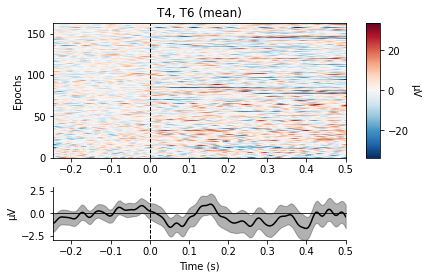

In [92]:
epochs['cue'].plot_image(
    picks=[
        'T4', 
        #'T3', 
        #'Cz',
        'T6'
    ],
    combine='mean')
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.


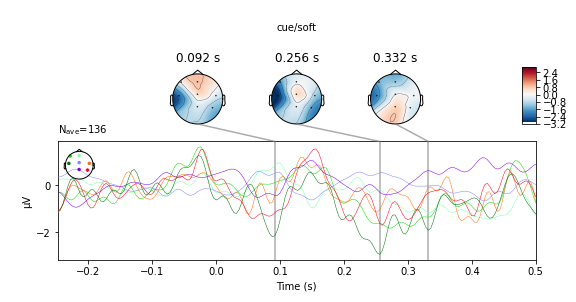

No projector specified for this dataset. Please consider the method self.add_proj.


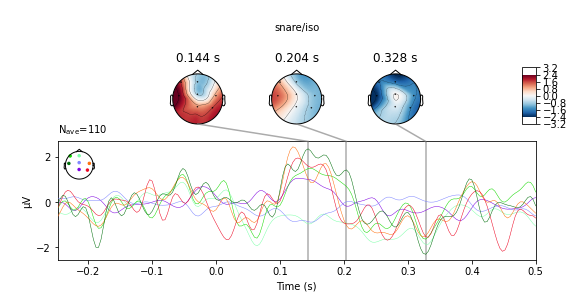

No projector specified for this dataset. Please consider the method self.add_proj.


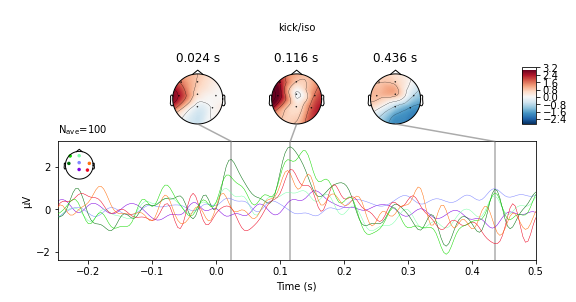

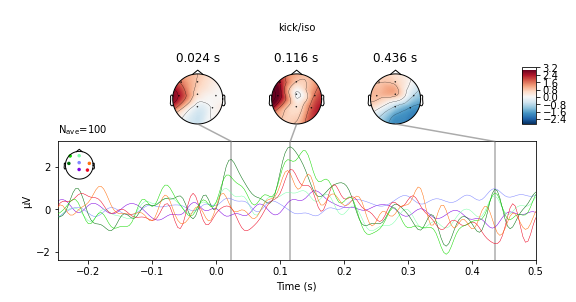

In [154]:
%matplotlib widget 

epochs['cue/soft'].average(picks=[
    #'Fp1',
    'Cz', 
    'T3', 
    'T4', 
    'Pz', 
    'T6', 
    'F7', 
    'Fz',
]).plot_joint(title='cue/soft')

epochs['snare/iso'].average(picks=[
    #'Fp1',
    'Cz', 
    'T3', 
    'T4', 
    'Pz', 
    'T6', 
    'F7', 
    'Fz',
]).plot_joint(title='snare/iso')

epochs['kick/iso'].average(picks=[
    #'Fp1',
    'Cz', 
    'T3', 
    'T4', 
    'Pz', 
    'T6', 
    'F7', 
    'Fz',
]).plot_joint(title='kick/iso')
plt.show()

No projector specified for this dataset. Please consider the method self.add_proj.


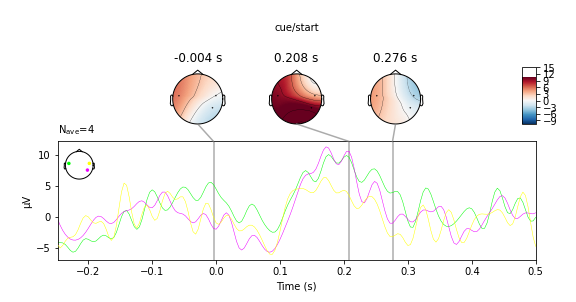

No projector specified for this dataset. Please consider the method self.add_proj.


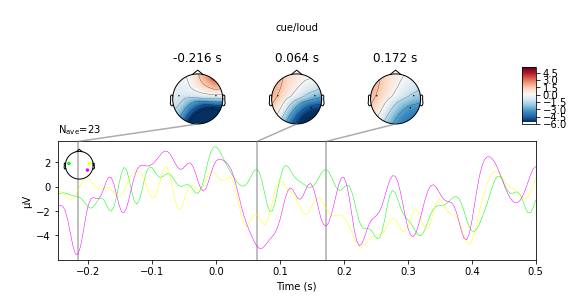

No projector specified for this dataset. Please consider the method self.add_proj.


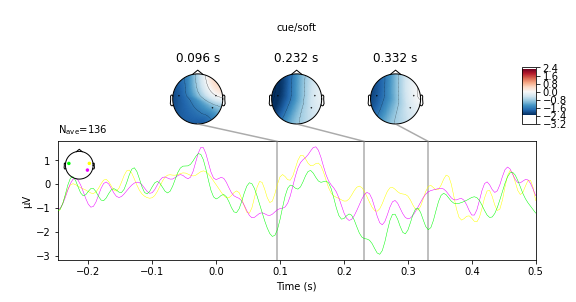

No projector specified for this dataset. Please consider the method self.add_proj.


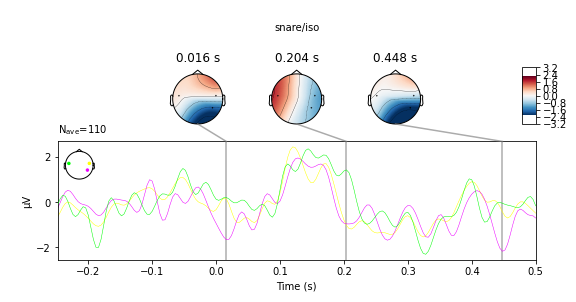

No projector specified for this dataset. Please consider the method self.add_proj.


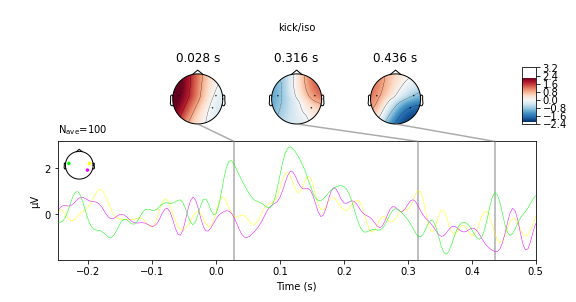

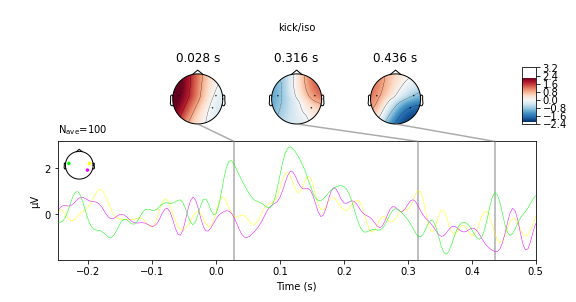

In [156]:
%matplotlib widget
t_chans = ['T3', 'T4', 'T6']
epochs['cue/start'].average(picks=t_chans).plot_joint(title='cue/start')
epochs['cue/loud'].average(picks=t_chans).plot_joint(title='cue/loud')
epochs['cue/soft'].average(picks=t_chans).plot_joint(title='cue/soft')
epochs['snare/iso'].average(picks=t_chans).plot_joint(title='snare/iso')
epochs['kick/iso'].average(picks=t_chans).plot_joint(title='kick/iso')
plt.show()

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


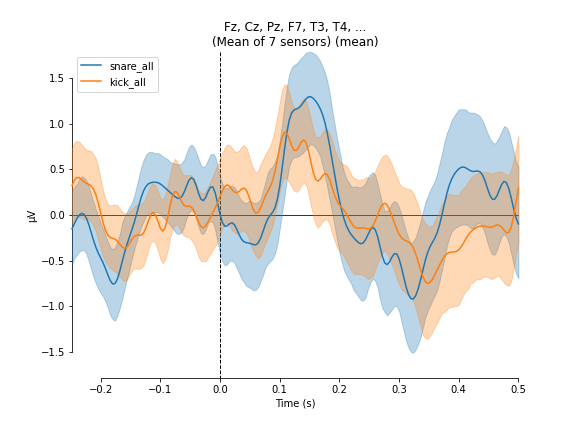

[<Figure size 576x432 with 1 Axes>]

In [167]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    snare_all=list(epochs['snare'].iter_evoked()),
    kick_all=list(epochs['kick'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(
    evokeds, 
    picks=[ 
        'Fz',
        'Cz', 
        'Pz',  
        'F7',
        'T3', 
        'T4', 
        'T6',
    ], 
    combine='mean')

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


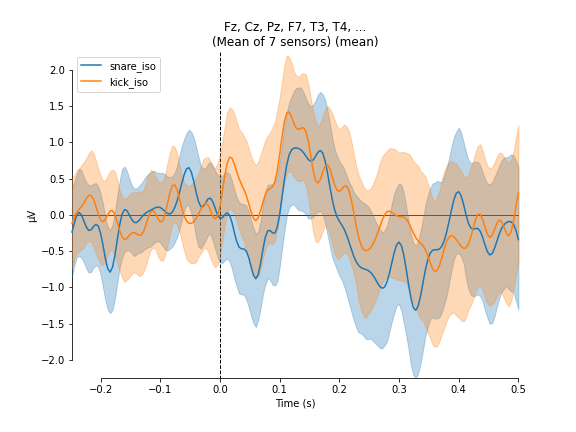

[<Figure size 576x432 with 1 Axes>]

In [169]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    snare_iso=list(epochs['snare/iso'].iter_evoked()),
    kick_iso=list(epochs['kick/iso'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(
    evokeds, 
    picks=[ 
        'Fz',
        'Cz', 
        'Pz',  
        'F7',
        'T3', 
        'T4', 
        'T6',
    ], 
    combine='mean')

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


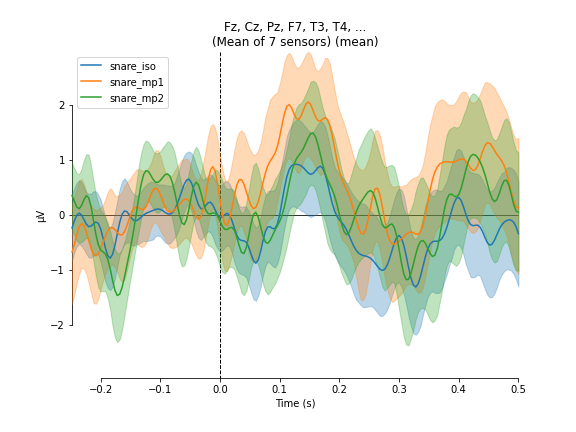

[<Figure size 576x432 with 1 Axes>]

In [171]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    snare_iso=list(epochs['snare/iso'].iter_evoked()),
    snare_mp1=list(epochs['snare/mp1'].iter_evoked()),
    snare_mp2=list(epochs['snare/mp2'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(
    evokeds, 
    #picks=['T6', 'T4', 'T3'], 
    picks=[ 
        'Fz',
        'Cz', 
        'Pz',  
        'F7',
        'T3', 
        'T4', 
        'T6',
    ],
    combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


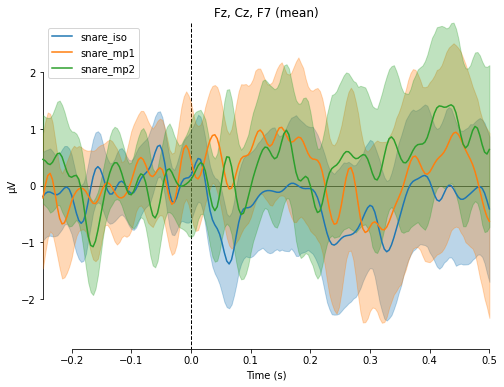

[<Figure size 576x432 with 1 Axes>]

In [132]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    snare_iso=list(epochs['snare/iso'].iter_evoked()),
    snare_mp1=list(epochs['snare/mp1'].iter_evoked()),
    snare_mp2=list(epochs['snare/mp2'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(evokeds, picks=['Fz', 'Cz', 'F7'], combine='mean')

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


/usr/local/lib/python3.9/site-packages/mne/viz/evoked.py:2377: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  axes = (plt.subplots(figsize=(8, 6))[1] for _ in ch_types)


combining channels using "mean"


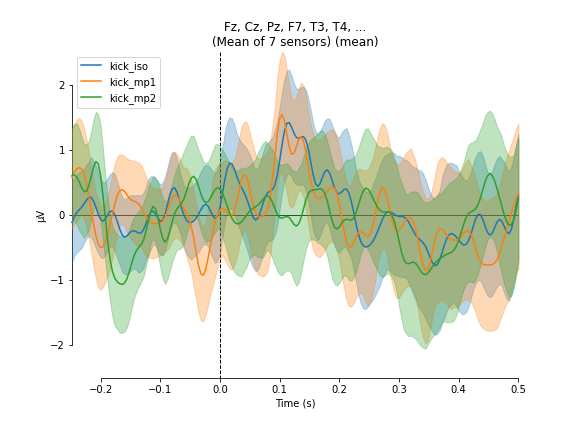

[<Figure size 576x432 with 1 Axes>]

In [172]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    kick_iso=list(epochs['kick/iso'].iter_evoked()),
    kick_mp1=list(epochs['kick/mp1'].iter_evoked()),
    kick_mp2=list(epochs['kick/mp2'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(
    evokeds, 
    #picks=['T6', 'T4', 'T3'], 
    picks=[ 
        'Fz',
        'Cz', 
        'Pz',  
        'F7',
        'T3', 
        'T4', 
        'T6',
    ],
    combine='mean')

combining channels using "mean"
combining channels using "mean"


/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/1072631501.py:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=['Cz'], combine='mean')


combining channels using "mean"


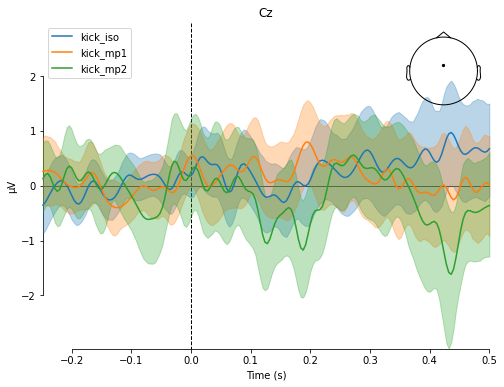

[<Figure size 576x432 with 2 Axes>]

In [139]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    kick_iso=list(epochs['kick/iso'].iter_evoked()),
    kick_mp1=list(epochs['kick/mp1'].iter_evoked()),
    kick_mp2=list(epochs['kick/mp2'].iter_evoked()),
)
mne.viz.plot_compare_evokeds(evokeds, picks=['Cz'], combine='mean')

combining channels using "mean"
combining channels using "mean"


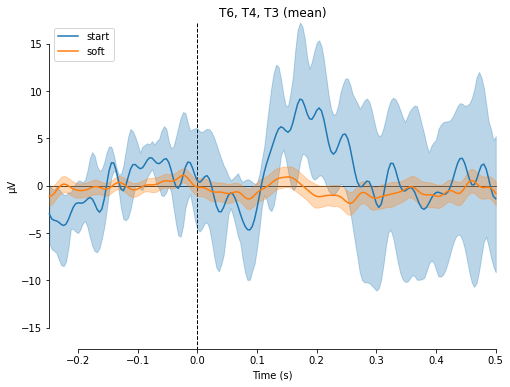

[<Figure size 576x432 with 1 Axes>]

In [144]:
evokeds = dict(
    #cue=list(epochs['cue'].iter_evoked()),
    start=list(epochs['cue/start'].iter_evoked()),
    soft=list(epochs['cue/soft'].iter_evoked()),
    #loud=list(epochs['cue/loud'].iter_evoked()), # not enough trials?
)
mne.viz.plot_compare_evokeds(evokeds, picks=['T6', 'T4', 'T3'], combine='mean')

Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/2473890458.py:3: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  epochs['kick/iso'].plot_image(
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/2473890458.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs['kick/iso'].plot_image(


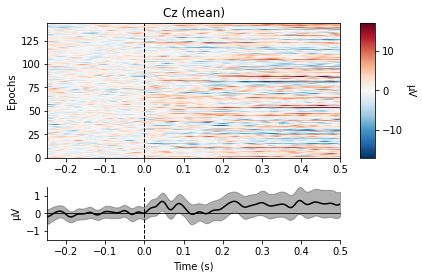

In [90]:
%matplotlib inline

epochs['kick/iso'].plot_image(
    picks=[
        #'T4', 
        #'T3', 
        'Cz',
    ], combine='mean')
plt.show()

Not setting metadata
110 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/388248970.py:1: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  epochs['snare/iso'].plot_image(
/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/388248970.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs['snare/iso'].plot_image(


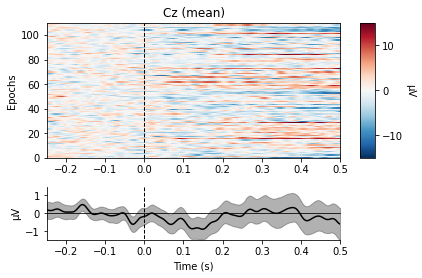

In [57]:
epochs['snare/iso'].plot_image(
    picks=[
        #'T4', 
        #'T3', 
        'Cz'
    ], combine='mean')
plt.show()

# ICA

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components


/var/folders/ht/40q7l54x4mj5smhxsk52lhrw0000gq/T/ipykernel_47401/100950993.py:8: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(


Fitting ICA took 0.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated


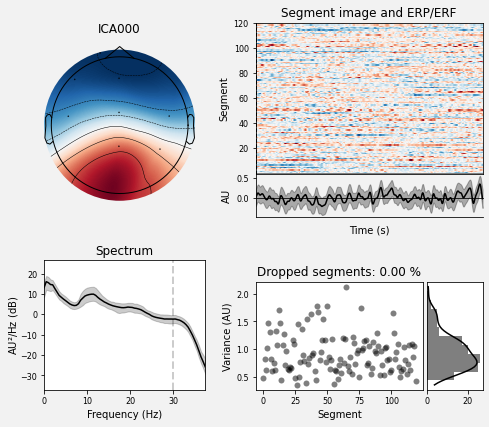

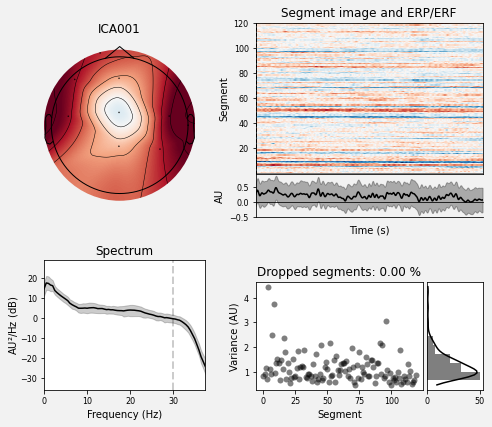

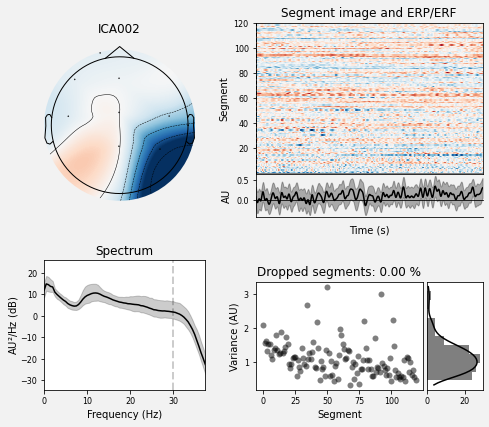

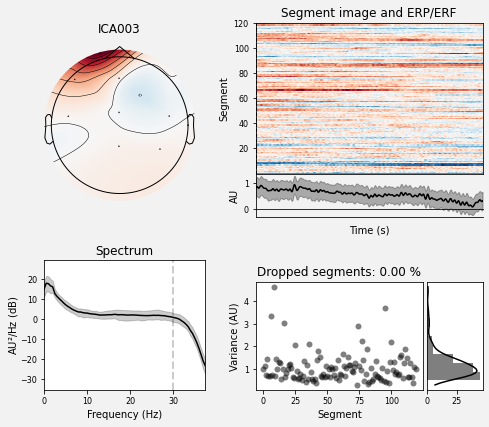

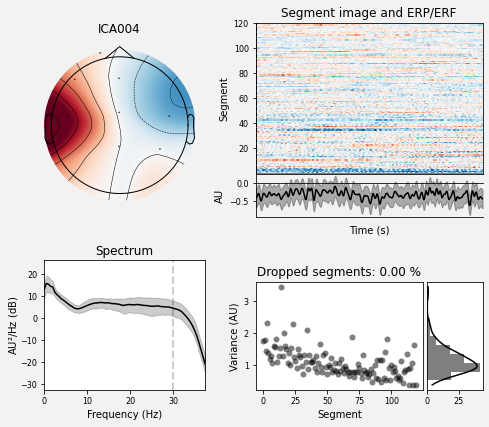

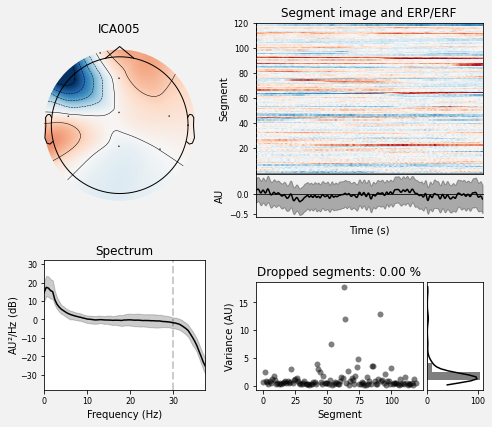

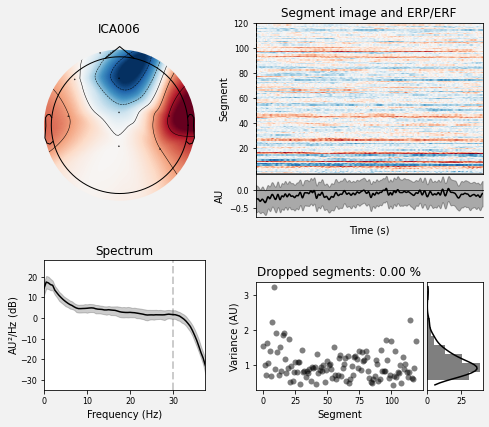

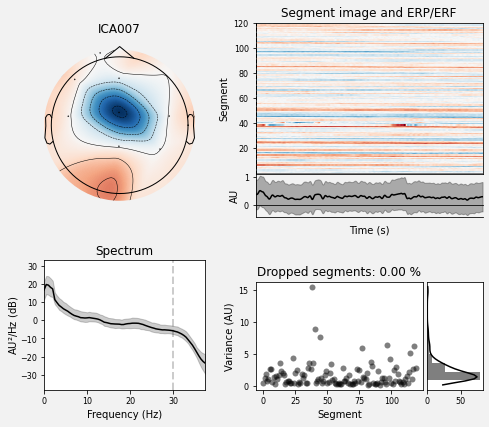

In [49]:
%matplotlib inline

# set up and fit the ICA
ica = mne.preprocessing.ICA(
    n_components=nchan,
)

ica.fit(
    epochs,
    reject_by_annotation=True # True by default
)

#ica.exclude = [1, 2]  # details on how we picked these are omitted here

ica.plot_properties(filt_reref, picks=range(nchan))
plt.show()

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


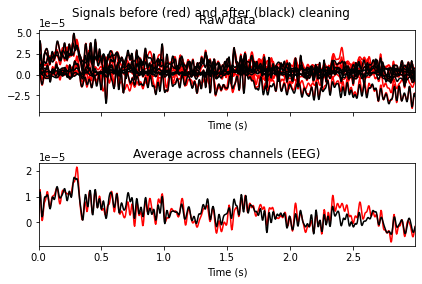

In [50]:
%matplotlib inline 

ica.plot_overlay(filt_reref, exclude=[0, 3], picks='eeg')
plt.show()

Not setting metadata
163 matching events found
No baseline correction applied
0 projection items activated


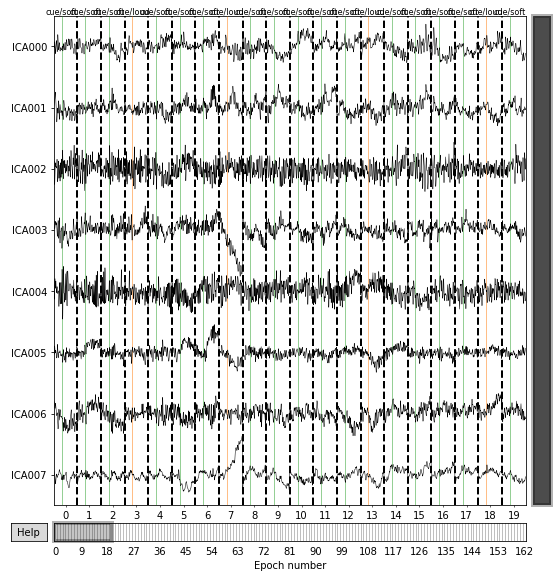

In [51]:
# %matplotlib widget

ica.plot_sources(epochs['cue'], show_scrollbars=True)
plt.show()

# Spectra

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/usr/local/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


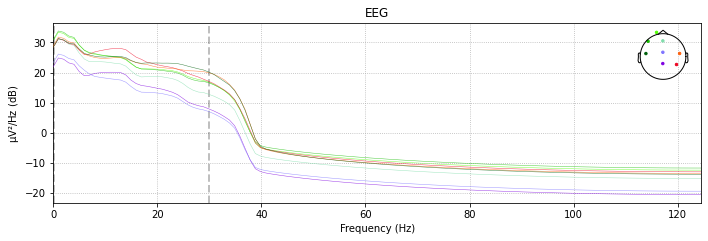

In [24]:
%matplotlib inline 

epochs['kick'].compute_psd().plot(picks='eeg')
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


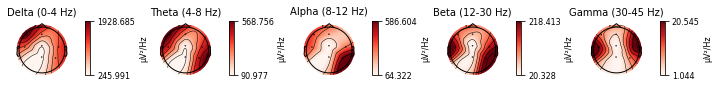

In [25]:
spectrum = epochs['kick'].compute_psd()
spectrum.plot_topomap()
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


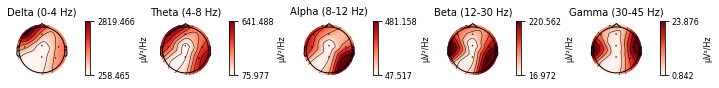

In [26]:
spectrum = epochs['snare'].compute_psd()
spectrum.plot_topomap()
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


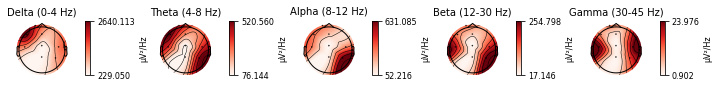

In [27]:
spectrum = epochs['cue'].compute_psd()
spectrum.plot_topomap()
plt.show()

Not setting metadata
245 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


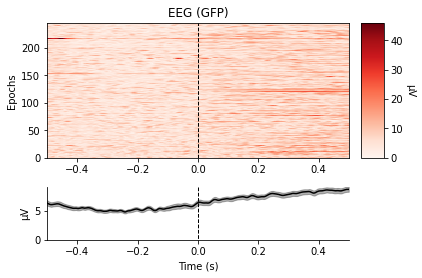

[<Figure size 432x288 with 3 Axes>]

In [28]:
epochs['snare'].plot_image(picks=['eeg'], combine='gfp')


Not setting metadata
247 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


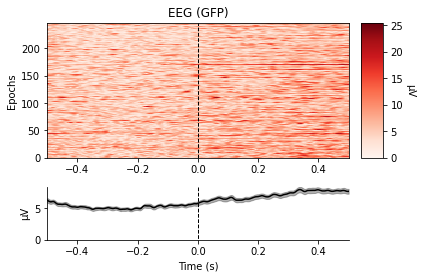

[<Figure size 432x288 with 3 Axes>]

In [29]:
epochs['kick'].plot_image(picks=['eeg'], combine='gfp')
